<a class="anchor" id="0"></a>
# **Multiclass Logistic Regression on Handwritten Digits Using Sklearn's Linear Model**

 
In this study we are going to use the Linear Model from Sklearn library to perform Multi class Logistic Regression. We are going to use handwritten digit's dataset from Sklearn. [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset)

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1. [Introduction](#1)
2. [Import Libraries](#2)
3. [Load the dataset](#3)
4. [Data Understanding](#4)
5. [Split the dataset](#5)
6. [Multi-class Logistic Regression using OVR](#6)
7. [Multinomial Logistic Regression](#7)
8. [Linear Discriminant Analysis (LDA)](#8)
9. [Support Vector Machine (SVM)](#9)
10. [Conclusions](#10)

# **1. Introduction** <a class="anchor" id="1"></a>

When outcome has more than to categories, Multi class regression is used for classification. For e.g. mail classification as primary, social, promotions, forums. We are going to use One Vs Rest (OVR) algorithm.
 
This is also called as one vs all algorithm. As name suggest in this algorithm we choose one class and put all other classes into second virtual class and run the binary logistic regression on it. We repeat this procedure for all the classes in the dataset. So we actually end up with binary classifiers designed to recognize each class in dataset
 
For prediction on given data, our algorithm returns probabilities for each class in the dataset and whichever class has the highest probability is our prediction

### Problem Statement
The data set contains images of hand-written digits: 10 classes where each class refers to a digit(0 to 9). Objective of our model is to predict the correct digit from 0 to 9, based on given handwritten image of digit.

# **2. Import Libraries** <a class="anchor" id="2"></a>

* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It's plotting library, and we are going to use it for data visualization
* datasets: Here we are going to use 'load_digits' dataset
* model_selection: Here we are going to use model_selection.train_test_split() for splitting the data
* linear_model: Here we are going to linear_model.LogisticRegression() for classification
* metrics: Here we are going use metrics.plot_confusion_matrix() and metrics.classification_report() for model analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

# **3. Load the dataset** <a class="anchor" id="3"></a>

* We are going to use [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset)
* Dataset characteristics are,
  - Number of Attributes: 64
  - Attribute Information: 8x8 image of integer pixels in the range 0 to 16.
  - Missing Attribute Values: None
  - Creator: Alpaydin (alpaydin ‘@’ boun.edu.tr)
  - Date: July; 1998

In [16]:
digits_df = datasets.load_digits()
print('Digits dataset structure= ', dir(digits_df))
print('Data shape= ', digits_df.data.shape)
print('Data contains pixel representation of each image, \n', digits_df.data)

Digits dataset structure=  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Data shape=  (1797, 64)
Data contains pixel representation of each image, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


# **4. Data Understanding** <a class="anchor" id="4"></a>

Dataset contains 10 classes(0 to 9 digits). There are 180 training example per class and total 1797 training examples. Each training example is 8x8 image i.e. flat array of 64 pixels or matrix of 8x8. Each pixel value is represented by integer from 0 to 16. So our input data is of shape (1797x64) i.e. 1797 rows and 64 columns
 
* digits.DESCR: Description of the dataset
* digits.data:  
  - ndarray of shape (1797, 64)
  - The flattened data matrix of training data.i.e Every 8x8 image data matrix is converted to 64 pixel flat array. 
  - We are going to use this data for model training
* digits.images:  
  - ndarray of shape (1797, 8, 8)
  - It contains raw image data in the form of 8x8 matrix
  - We are going to use this data for plotting the images
* digits.target: Contains target value(0 to 9) for each training examples, so it contains 1797, y labels
* digits.target_names: Contains name for each target since we have 10 classes it contains 10 names only
 
Here digits.data is our independent/inputs/ X variables
 
And digits.target is our dependent/target/y variable

### Data Visualization
Let's visualize the images from digits dataset

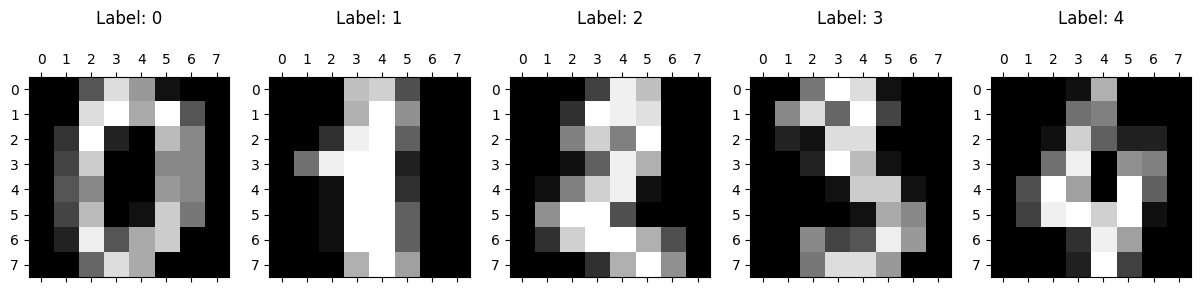

In [17]:
# Using subplot to plot the digits from 0 to 4
rows = 1
columns = 5
fig, ax =  plt.subplots(rows, columns, figsize = (15,6))

plt.gray()
for i in range(columns):
  ax[i].matshow(digits_df.images[i]) 
  ax[i].set_title('Label: %s\n' % digits_df.target_names[i])

plt.show()

# **5. Split the Dataset** <a class="anchor" id="5"></a>


### Create Feature Matrix X and Label Vector y
Note for training and testing we are going to use 'digits_df.data' and not 'digits_df.images'

In [18]:
X = digits_df.data
y = digits_df.target

### Create Test And Train Dataset
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
* We will keep 20% of data for testing and 80% of data for training the model

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimensions = ', X_train.shape)
print('X_test dimensions = ', X_test.shape)
print('y_train dimensions = ', y_train.shape)
print('y_test dimensions = ', y_test.shape)

X_train dimensions =  (1437, 64)
X_test dimensions =  (360, 64)
y_train dimensions =  (1437,)
y_test dimensions =  (360,)


# **6. Multi-class Logistic Regression Using OVR** <a class="anchor" id="6"></a>
* Since we are going to use One Vs Rest algorithm, set >  multi_class='ovr'
* Note: since we are using One Vs Rest algorithm we must use 'liblinear' solver with it.

In [21]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')

lm.fit(X_train, y_train)

lm_score_train = lm.score(X_train, y_train)
lm_score_test = lm.score(X_test, y_test)

print(f"Score of OVR logistic regression on training data = ", lm_score_train)
print(f"Score of OVR logistic regression on testing data = ", lm_score_test)

Score of OVR logistic regression on training data =  0.9965205288796103
Score of OVR logistic regression on testing data =  0.9694444444444444


# **7. Multinomial Logistic Regression** <a class="anchor" id="7"></a>

In [20]:
mlr = linear_model.LogisticRegression(multi_class="auto")

mlr.fit(X_train, y_train)

mlr_score_train = mlr.score(X_train, y_train)
mlr_score_test = mlr.score(X_test, y_test)

print(mlr_score_train)
print(mlr_score_test)

1.0
0.9694444444444444


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **8. Linear Discriminant Analysis** <a class="anchor" id="8"></a>

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

lda_train = lda.score(X_train, y_train)
lda_test= lda.score(X_test, y_test)

print(lda_train)
print(lda_test)

0.9659011830201809
0.9611111111111111


# **9. Support Vector Machine** <a class="anchor" id="9"></a>

In [30]:
from sklearn import svm
svm1 = svm.SVC(decision_function_shape='ovr') # SVC is the support vector classifier, 'ovr' means one vs rest.
svm1.fit(X_train, y_train)
svm_train = svm1.score(X_train, y_train)
svm_test = svm1.score(X_test, y_test)

print(svm_train)
print(svm_test)

0.9944328462073765
0.9916666666666667


# **10. Conclusions** <a class="anchor" id="10"></a>

Comparing Accuracy Scores of different models

In [23]:
print(f"Accuracy of OVR logistic regression on training set = ", lm_score_train)
print(f"Accuracy of OVR logistic regression on testing set = ", lm_score_test)
print(f"Accuracy of multinomial logistic regression on training set = ", mlr_score_train)
print(f"Accuracy of multinomial logistic regression on testing set  = ", mlr_score_test)
print(f"Accuracy of LDA on training set= ", lda_train)
print(f"Accuracy of LDA on test set = ", lda_test)

Accuracy of OVR logistic regression on training set =  0.9965205288796103
Accuracy of OVR logistic regression on testing set =  0.9694444444444444
Accuracy of multinomial logistic regression on training set =  1.0
Accuracy of multinomial logistic regression on testing set  =  0.9694444444444444
Accuracy of LDA on training set=  0.9659011830201809
Accuracy of LDA on test set =  0.9611111111111111


### Classification Reports
Classification report is used to measure the quality of prediction from classification algorithm
 
* Precision: Indicates how many classes are correctly classified
* Recall: Indicates what proportions of actual positives was identified correctly
* F-Score: It is the harmonic mean between precision & recall
* Support: It is the number of occurrence of the given class in our dataset

In [24]:
print("Classification report for OVR logistic regression:\n")
print(metrics.classification_report(y_test, lm.predict(X_test)))

Classification report for OVR logistic regression:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.91      0.94      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [25]:
print("Classification report for multinomial logistic regression:\n")
print(metrics.classification_report(y_test, mlr.predict(X_test)))

Classification report for multinomial logistic regression:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [26]:
print("Classification report for linear discriminant analysis:\n")
print(metrics.classification_report(y_test, lda.predict(X_test)))

Classification report for linear discriminant analysis:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.91      0.94        35
           2       0.97      0.97      0.97        36
           3       1.00      0.95      0.97        41
           4       1.00      1.00      1.00        38
           5       0.97      0.97      0.97        30
           6       0.97      1.00      0.99        37
           7       0.97      0.95      0.96        37
           8       0.87      0.93      0.90        29
           9       0.86      0.94      0.90        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Confusion Matrix
* Confusion matrix helps to visualize the performance of the model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label
* Off-diagonal elements are those that are mislabeled by the classifier.
* The higher the diagonal values of the confusion matrix the better, indicating many correct
 
Let's create confusion matrix using sklearn library and test data

Confusion matrix for OVR logistic regression:



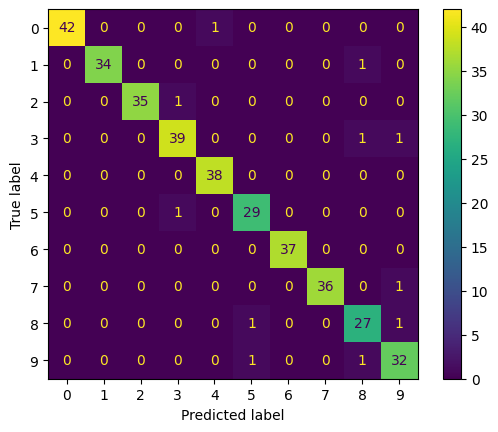

In [27]:
print("Confusion matrix for OVR logistic regression:\n")
metrics.ConfusionMatrixDisplay.from_estimator(estimator=lm, X=X_test, y=y_test)

Confusion matrix for multinomial logistic regression:



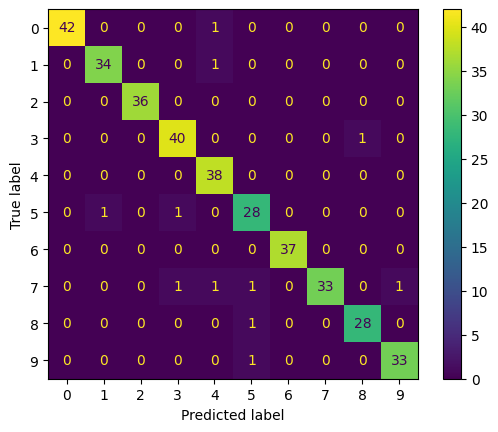

In [28]:
print("Confusion matrix for multinomial logistic regression:\n")
metrics.ConfusionMatrixDisplay.from_estimator(estimator=mlr, X=X_test, y=y_test)

Confusion matrix for linear discriminant analysis:



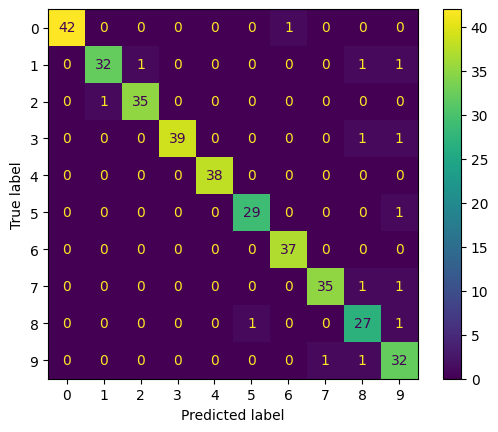

In [29]:
print("Confusion matrix for linear discriminant analysis:\n")
metrics.ConfusionMatrixDisplay.from_estimator(estimator=lda, X=X_test, y=y_test)

From the results we got, we can notice that all three models perdorm well on the test set. The multinomial logistic regression seems to perform slightly better than the OVR model and LDA on both train and test set.